<a href="https://colab.research.google.com/github/kashishkhera44/comp215/blob/main/labs/lab03-classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 3
----------------
#### Name(s):Kashish Khera
#### Date:22 January 2025

By the end of this lab you should be able to:
  * use a `class` to organize related data and functions
  * identify a `record` as a related collection of data, with fields for each data value

During this lab, you will be introduced to the following:
  * the `@dataclass` decorator to simplify class definition for classes that primarily encapsulate a data structure.
  * the `@classmethod` decorator to create 'object factories'.
  * plotting frequency distributions in `matplotlib`



## Near Earth Objects (with classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In this lab we will define an Asteroid class to help us structure the data for easier data analysis.  Here's a brief review from Lab 2 on how to use the API.  

In [38]:
# import necessary modules
import datetime, json, requests
from dataclasses import dataclass
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.  Read these functions carefully to be sure you know what they are returning.  Note the nested for loop structure in the return statement of the `get_neos` function - be sure to understand what it is doing.  You might want to add some more `pprint` statements to be sure you understand the data structures.

In [39]:
API_KEY = 'aMyvm07dkmDrH0Lktiwf5JUg7srNobWQ5BkdVYOY'  # substitute your API key here

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2025-01-19'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
pprint(neo)

KeyError: 'element_count'

## Exercise 1:  Define an Asteroid class

Define a simple Asteroid class with some basic state variables for a single NEO.  Your Asteroid class should define at least 4 "state variables:”

    id
    name
    estimated_diameter (m)
    is_potentially_hazardous (bool)

Operations must include:
* `__init__(self, ...)` method to initialize a new Asteroid object with specific data values
* `__str__(self)`, and `__repr__(self)` methods that return nicely formatted string representations of the object.

Write a little code to test your new class.

In [40]:
# Ex.1 your code here
class Asteroid:
  def __init__(self,id,name,estimated_diameter,is_potentially_hazardous):
    self.id = id;
    self.name = name;
    self.estimated_diameter = estimated_diameter;
    self.is_potentially_hazardous = is_potentially_hazardous;

  def __str__(self):
    return f"Asteroid's id: {self.id} \n Name: {self.name} \n Estimated Diameter: {self.estimated_diameter} \n Potentially hazardous: {self.is_potentially_hazardous}";

  def __repr__(self):
    return f"Asteroid's id: {self.id} \n Name: {self.name} \n Estimated Diameter: {self.estimated_diameter} \n Potentially hazardous: {self.is_potentially_hazardous}";


ast = Asteroid(neo['id'],neo['name'],neo['estimated_diameter']['meters']['estimated_diameter_max'],neo['is_potentially_hazardous_asteroid']);
print(ast);



Asteroid's id: 3342322 
 Name: (2006 SE6) 
 Estimated Diameter: 151.370058502 
 Potentially hazardous: False


## Exercise 2: Make a histogram

Create a list of all the Asteroid objects from this week's NEO feed and use the list to create a histogram to visualize the distribution of Asteroid diameters.  To create the historgram use the `hist()` method in the `matplotlib.pyplot` module.

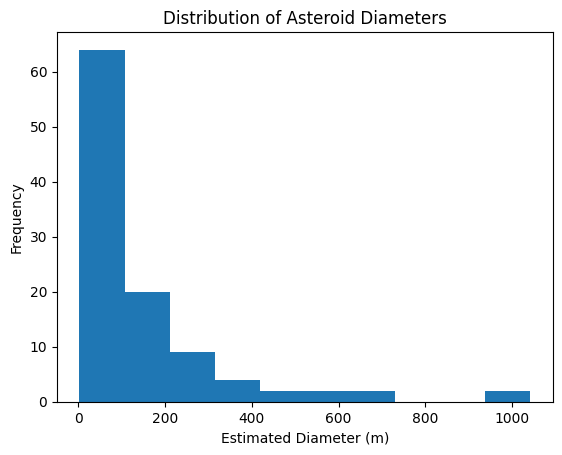

In [41]:
# Ex. 2 your code here


estimated_diameters = [neo['estimated_diameter']['meters']['estimated_diameter_max'] for neo in neos]

# Create histogram using matplotlib
plt.hist(estimated_diameters)
plt.xlabel('Estimated Diameter (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Asteroid Diameters')
plt.show()


## Exercise 3: Use `@dataclass` and `@classmethod` to do the same thing

Now that you know how to define a simple class, we are going to use a use decorators to simplify (ie. shorten) our class definitions.  You will redefine the Asteroid class in this exercise.  Note that having two different definitions of a class in a single piece of code is very bad practice. I am asking you to do it here just so that you can see the differt ways to define classes.

 1. Use the `@dataclass` decorator from the `dataclasses` module to define the Asteroid class.  The `@dataclass` decorator will automatically generate some of the commonly used methods, like `__init()__`, `__repr()__`, and `__eq()__`.  The definition should start like this:
    ```
    @dataclass
    class Asteroid:
      ...
    ```
Write a little code to test your new class.
  

 2. Use the `@classmethod` decorator to construct a `from_NEO()` 'factory method' inside your Asteroid class that creates Asteroid objects from the NEO API.  The method should take the id for a single NEO, fetche the NEO record from API, constructs a single Asteroid object, and return the Asteroid object representing that NEO.  This kind of method is called a “Factory” because it constructs an object from raw materials.  The object factory method should start like this:
    ```
    @classmethod
    from_NEO(cls, neo_id):
        ...
    ```
Write a little code to test your new method.

 3. Use your new Asteroid class to create a list of Asteroid objects.  Use this list to create the same historgram as in Exercise 2.  




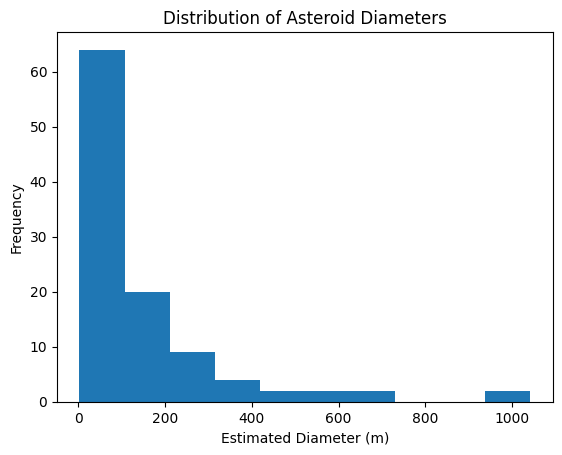

In [42]:
from dataclasses import dataclass
import requests
import matplotlib.pyplot as plt

# Define the Asteroid class using @dataclass
@dataclass
class Asteroid:
    id: str
    name: str
    estimated_diameter: float
    is_potentially_hazardous: bool

    @classmethod
    def from_NEO(cls, neo_id):

        return cls(id=neo['id'],name=neo['name'],estimated_diameter=estimated_diameter,is_potentially_hazardous=is_potentially_hazardous )


estimated_diameters = [neo['estimated_diameter']['meters']['estimated_diameter_max'] for neo in neos]

# Create histogram using matplotlib
plt.hist(estimated_diameters)
plt.xlabel('Estimated Diameter (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Asteroid Diameters')
plt.show()



## Challenge Exercise:

One of your esteemed astromoner collegues has a theory that there is a correlation between the diameter and the orbital period of an asteroid.  Add the `orbital_period` data from the NEO API to your Asteroid class definition and use it to plot the orbital period (in years) versus the estimated diameter (in m) of all the asteroids from this week's NEO record.  Do you see a correlation?

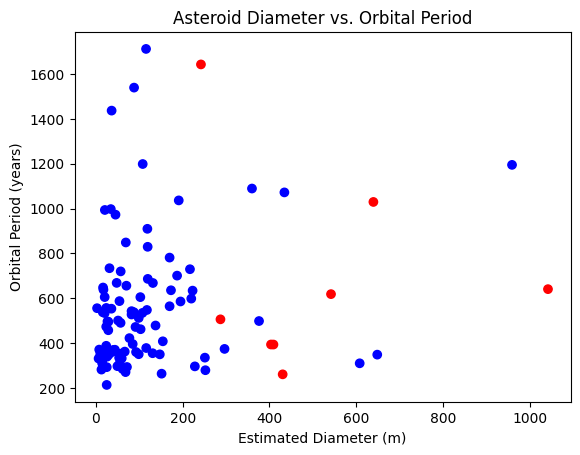

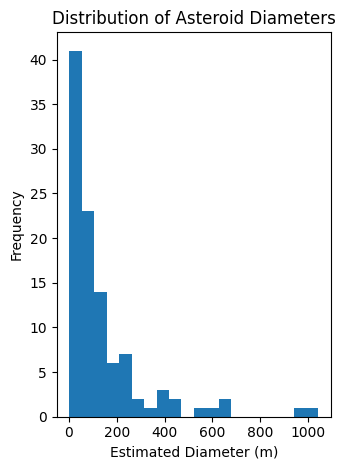

In [62]:
# Ex. Challenge your code here
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class Asteroid:
    id: str
    name: str
    estimated_diameter: float = None  # Initialize to None to handle missing data
    is_potentially_hazardous: bool = False
    orbital_period: float = None  # Added orbital_period attribute, initialized to None

    @classmethod
    def from_NEO(cls, neo_id):
        """Fetches NEO data from API and creates an Asteroid object."""
        # Fetch the NEO record using the provided neo_id
        neo_data = get_neo(neo_id)
        # Extract the estimated diameter, handling missing data
        estimated_diameter = neo_data.get('estimated_diameter', {}).get('meters', {}).get('estimated_diameter_max')
        # Extract the potentially hazardous status
        is_potentially_hazardous = neo_data['is_potentially_hazardous_asteroid']

        # Extract orbital period
        orbital_data = neo_data.get('orbital_data', {})
        orbital_period = orbital_data.get('orbital_period')
        if orbital_period is not None:
            try:
                orbital_period = float(orbital_period)  # Attempt to convert to float
            except ValueError:
                orbital_period = None  # Set to None if conversion fails

        # Return a new Asteroid object using the extracted data
        return cls(id=neo_data['id'], name=neo_data['name'], estimated_diameter=estimated_diameter, is_potentially_hazardous=is_potentially_hazardous, orbital_period=orbital_period)

asteroids = []
diameters = []
orbital_periods = []

for neo_record in neos:
    asteroid_obj = Asteroid.from_NEO(neo_record['id'])
    asteroids.append(asteroid_obj)
    # Append diameter and orbital period only if they are available
    if asteroid_obj.estimated_diameter is not None:
        diameters.append(asteroid_obj.estimated_diameter)
    if asteroid_obj.orbital_period is not None:
        orbital_periods.append(asteroid_obj.orbital_period)
colors = ['red' if asteroid_obj.is_potentially_hazardous else 'blue' for asteroid_obj in asteroids]
# Create scatter plot
plt.scatter(diameters, orbital_periods,c=colors)
plt.xlabel('Estimated Diameter (m)')
plt.ylabel('Orbital Period (years)')
plt.title('Asteroid Diameter vs. Orbital Period')
plt.show()
# Create histogram
plt.subplot(1, 2, 2)  # Create a subplot for the histogram
plt.hist(diameters, bins=20)  # You can adjust the number of bins
plt.xlabel('Estimated Diameter (m)')
plt.ylabel('Frequency')
plt.title('Distribution of Asteroid Diameters')

plt.tight_layout()  # Adjust subplot spacing
plt.show()